# Data cleaning and early visualizations

# Importing and cleaning data

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import numpy as np
import scipy.stats as stats

In [103]:
math_df = pd.read_csv('data/student-mat.csv', delimiter = ';') #read csv files into Dataframes for the Portuguese data
port_df = pd.read_csv('data/student-por.csv', delimiter = ';')

In [104]:
# for port_col in port_df.columns:  #This is basically to check if the values are the same for many columns, indicating
#     for math_col in math_df.columns: # the same students were used. This does not seem to be the case, further inspection
#         if port_df[port_col].name == math_df[math_col].name: #s shows they are not the same either.
#             if port_df[port_col] == math_df[math_col]:
#                 print(True)
#             else:
#                 print(False)
#         else: 
#             print('not same column')

len(port_df) == len(math_df) # check their lengths

False

In [105]:
port_df.index.name = 'student' # set index name to student, since they are the same in each and we can consider this
math_df.index.name = 'student' # an ID for the students.

In [106]:
# Here we'll check for null values in the dataframes using isnull()
if port_df.isnull().any().any() == True:
    print('port_df has null values')
else:
    print('port_df has no null values')
    
if math_df.isnull().any().any() == True:
    print('math_df has null values')
else:
    print('math_df has no null values')


port_df has no null values
math_df has no null values


In [107]:
# since there are no null values now we can check for any outliers using describe
math_df.describe().loc[['mean','max','min']]

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.55443,5.708861,10.908861,10.713924,10.41519
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,75.000000,19.000000,19.000000,20.00000
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000,3.000000,0.000000,0.00000


In [108]:
port_df.describe().loc[['mean','max','min']]
# since the data is from a non open ended questionare, there is little likelihood for outliers.
# By checking the mean, min, max we can more easily see outliers. We see that the absences have
# some extreme outliers. Also the daily/weekend alcohol consumption seems to potentially
# have some outliers as well. 
# To fix the absences outliers, we can group them into categories such as: absences < 5, 5 < absences < 10, 
# 10 < absences < 15, absences > 15. Which we will do below:

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.22188,3.930663,3.180277,3.1849,1.502311,2.280431,3.53621,3.659476,11.399076,11.570108,11.906009
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.00000,5.000000,5.000000,5.0000,5.000000,5.000000,5.00000,32.000000,19.000000,19.000000,19.000000
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.00000,1.000000,1.000000,1.0000,1.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000


In [109]:
absence_df = pd.DataFrame(port_df.absences.groupby(port_df.absences).count())    #this is code just to determine the dist-
absence_df = absence_df.rename(columns = {'absences':'student_count'})           # ribution of the absences 
# float(absence_df.student_count[7:].sum())/(absence_df.student_count.sum())

In [110]:
port_df.loc[port_df.absences <= 1,'abs_group'] = 1                                # grouping ranges for the absences
port_df.loc[(port_df.absences >= 2) & (port_df.absences <= 3), 'abs_group'] = 2
port_df.loc[(port_df.absences >= 4) & (port_df.absences <= 6), 'abs_group'] = 3
port_df.loc[port_df.absences >= 7, 'abs_group'] = 4
port_df = port_df.drop('absences', axis = 1)

math_df.loc[math_df.absences <= 1,'abs_group'] = 1                                # grouping ranges for the absences
math_df.loc[(math_df.absences >= 2) & (math_df.absences <= 3), 'abs_group'] = 2
math_df.loc[(math_df.absences >= 4) & (math_df.absences <= 6), 'abs_group'] = 3
math_df.loc[math_df.absences >= 7, 'abs_group'] = 4
math_df = math_df.drop('absences', axis = 1)

In [111]:
#https://data.oecd.org/pisa/reading-performance-pisa.htm#indicator-chart     (url from where the data was taken)
# here we import data for the PISA test results according to each country 2009
PISA_math_df = pd.read_csv('data/PISA_math2.csv')
PISA_reading_df = pd.read_csv('data/PISA_reading2.csv')
PISA_math_df = PISA_math_df.groupby('LOCATION').mean()
PISA_reading_df = PISA_reading_df.groupby('LOCATION').mean()
PISA_math_df = PISA_math_df.rename(columns = {'Value': 'math_val'})
PISA_reading_df = PISA_reading_df.rename(columns = {'Value': 'reading_val'})
PISA_df = pd.merge(PISA_math_df, PISA_reading_df, how = 'inner', left_index = True, right_index = True)
PISA_df = PISA_df.drop(['TIME_x','Flag Codes_x','TIME_y', 'Flag Codes_y'], axis = 1)    # final test results for 2010

In [112]:
# importing the teacher to student ratio 2010
# https://stats.oecd.org/Index.aspx?DataSetCode=EAG_PERS_RATIO
ratio_df = pd.read_csv('data/ratio.csv')
ratio_df = ratio_df.loc[(ratio_df['Year'] == 2010)]
ratio_df = ratio_df.loc[(ratio_df.INDICATOR == 'PERS_AVG_CLASS')]
ratio_df = ratio_df.loc[ratio_df.REF_SECTOR == 'INST_T']
ratio_df = ratio_df.drop(['ISC11_LEVEL_CAT', 'YEAR', 'Reference Period Code', 'Reference Period', 'PowerCode', 'PowerCode Code', 'Unit Code', 'Unit'], axis = 1)
ratio_df = ratio_df.loc[ratio_df.Value == ratio_df.Value.fillna(0)]
ratio_df = ratio_df.groupby(['COUNTRY']).mean()   #there are multiple values for diff. school levels
ratio_df.rename(columns = {'Value' : 'class_size'}, inplace = True)

In [113]:
#educational spending from the world bank data for year 2009 (% of government expenditure on education)
# Source: https://data.worldbank.org/indicator/SE.XPD.SECO.PC.ZS
spend_df = pd.read_csv('data/API_SE.XPD.SECO.ZS_DS2_en_csv_v2_10250946.csv')
spend_df = spend_df[['Country Code','Indicator Name','2009']]
spend_df.dropna(inplace = True)
spend_df.set_index('Country Code', inplace = True)
spend_df.rename(columns = {'2009': '% of government expenditure on education'}, inplace = True)

In [114]:
for i in PISA_df.index:
    if sum(i == ratio_df.index) == 0:
        PISA_df.drop(i, inplace = True)
for i in ratio_df.index:
    if sum(i == PISA_df.index) == 0:
        ratio_df.drop(i, inplace = True)
PISA_size_df = pd.merge(PISA_df, ratio_df, how = 'inner', left_index=True, right_index=True)
for i in PISA_df.index:
    if sum(i == spend_df.index) == 0:
        PISA_df.drop(i, inplace = True)
for i in spend_df.index:
    if sum(i == PISA_df.index) == 0:
        spend_df.drop(i, inplace = True)
PISA_spend_df = pd.merge(PISA_df, spend_df, how = 'inner', left_index=True, right_index=True)

# Exploratory Data Analysis

the main question to be asked is: what factors most influence a students educational success? To answer this, it is necessary to take a look at the relationship between the independent variables and the grades obtained in the datasets. 

In the following cell, the average (between the math and reading portions) 2009 PISA grade for each country is plotted against the 'government expenditure on education as a % of the GDP' and the 'average class size'. This presents information about how these variables affect countrywide grades. One can see there is a slight positive correlation for government expenditure, whereas there is a negative correlation with class size. To truly see how this might benefit Portugal, it is important to compare the trends with Portugal's position in them. That is, is Portugals average class size just right, too small, or too large for the given trends. 

As one can see, the average PISA grade has a somewhat positive correlation with the government expenditure on education. Also, one can see a negative correlation between the class size and average PISA grade. 


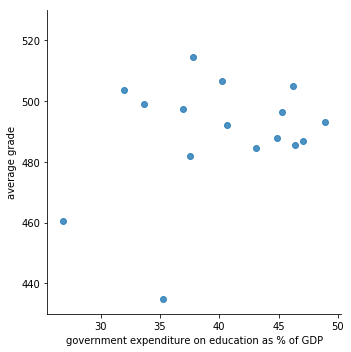

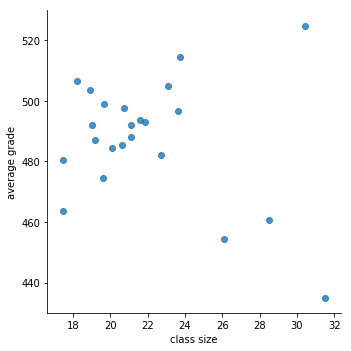

In [115]:
PISA_size_df['avg_grade'] = (PISA_size_df.math_val + PISA_size_df.reading_val)/2
PISA_spend_df['avg_grade'] = (PISA_spend_df.math_val + PISA_spend_df.reading_val)/2
sns.lmplot(x = '% of government expenditure on education', y = 'avg_grade', data = PISA_spend_df, fit_reg = False)
# plt.xlim([17,24])
plt.xlabel('government expenditure on education as % of GDP')
plt.ylabel('average grade')
plt.ylim([430,530])
sns.lmplot(x = 'class_size', y = 'avg_grade', data = PISA_size_df, fit_reg = False)
plt.xlabel('class size')
plt.ylabel('average grade')
# plt.xlim([17,24])
plt.ylim([430,530])
plt.show()

In [116]:
# PISA_size_df['avg_grade'] == PISA_spend_df['avg_grade']
# PISA_spend_df.groupby('avg_grade').count().plot(kind = 'hist')
# plt.show()
# plt.hist(PISA_spend_df.groupby('avg_grade').count().index, PISA_spend_df.groupby('avg_grade').count().math_val)
# sns.distplot(PISA_spend_df.avg_grade, bins = 10)
PISA_spend_df.avg_grade.describe()

# plt.show()

count     20.000000
mean     486.600000
std       35.001729
min      399.000000
25%      483.875000
50%      492.500000
75%      503.875000
max      542.500000
Name: avg_grade, dtype: float64

# Plotting of G3 vs. Independent Variables

Here the relationship between final average grades (G3) are plotted against the independent variables present in the questionnaire. When the column is categorical data, a bar plot is used. And when the column has an inherent hierarchy, a scatter plot is used. Note that in each case a 90 % confidence interval is utilized.

/home/kosta/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


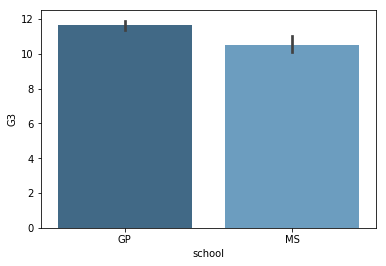

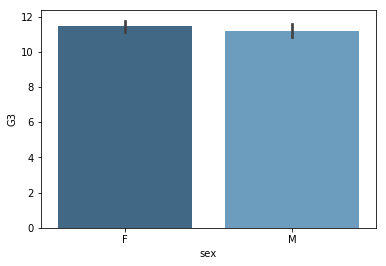

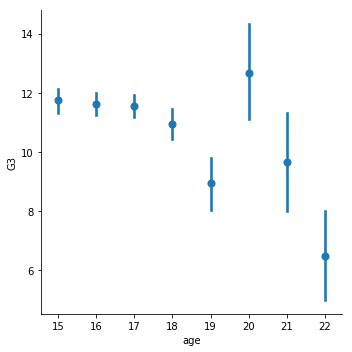

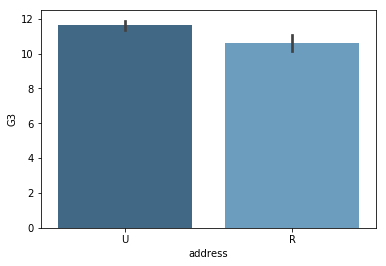

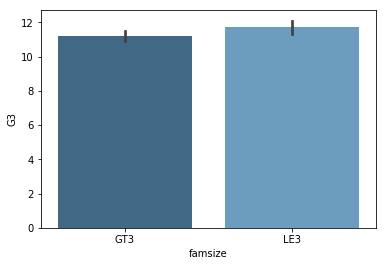

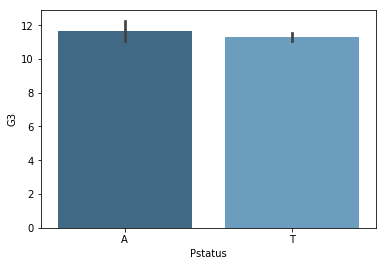

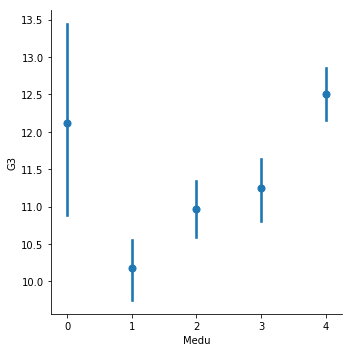

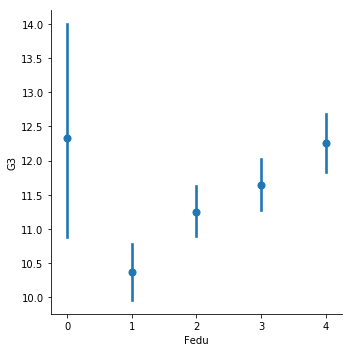

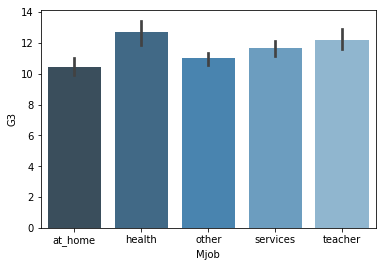

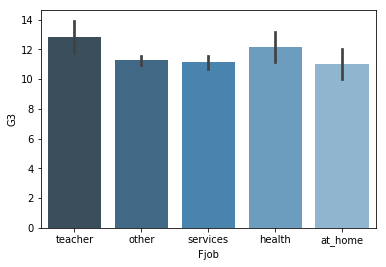

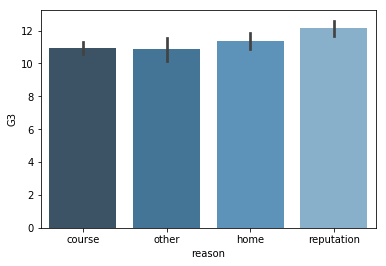

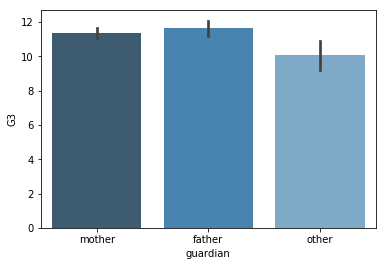

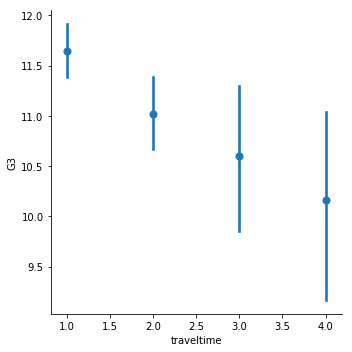

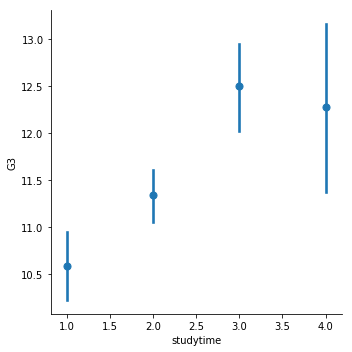

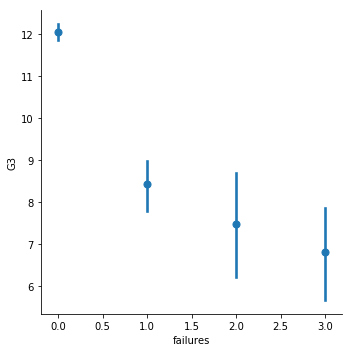

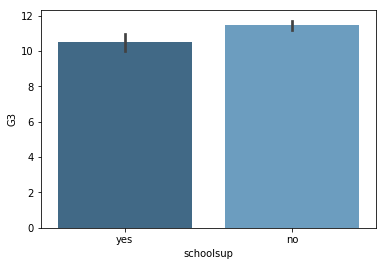

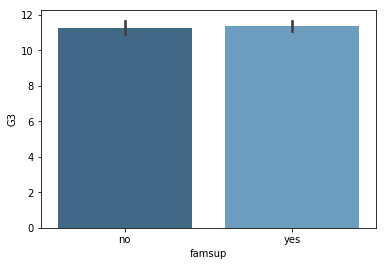

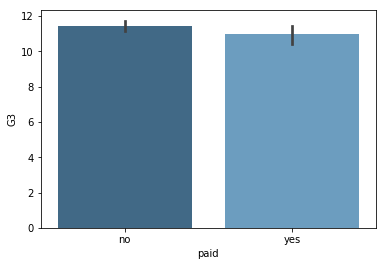

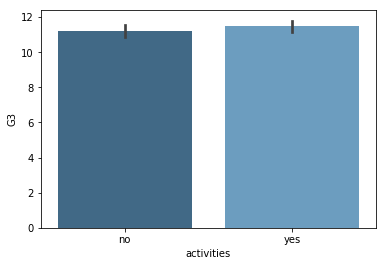

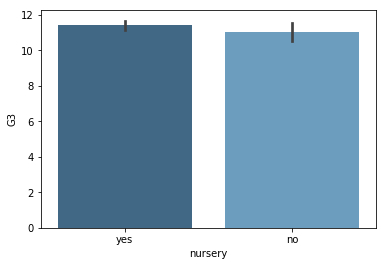

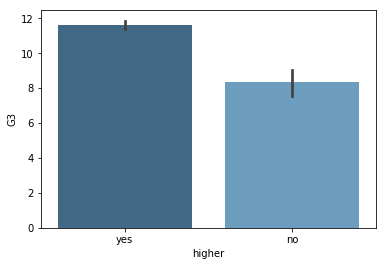

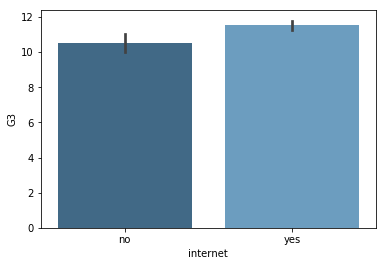

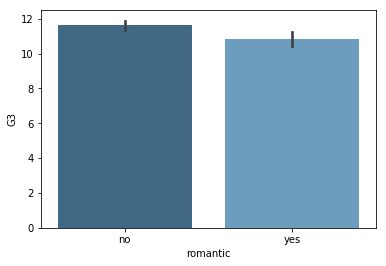

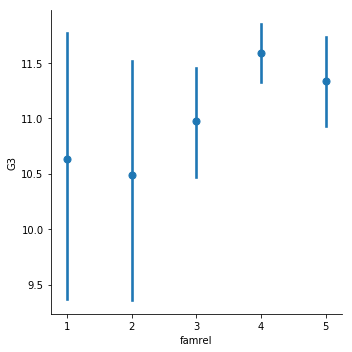

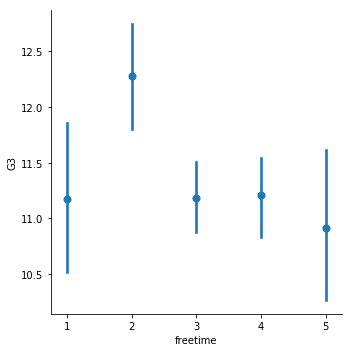

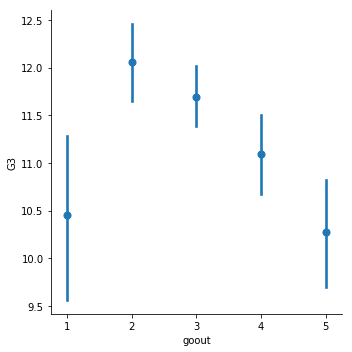

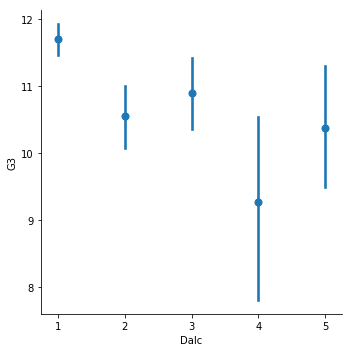

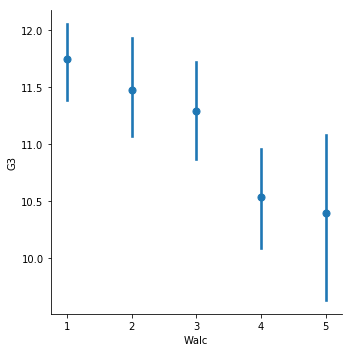

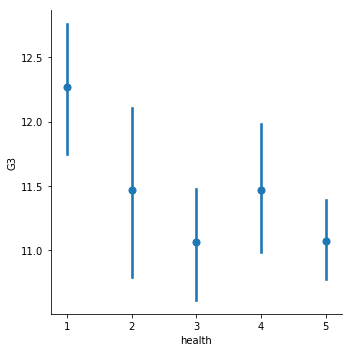

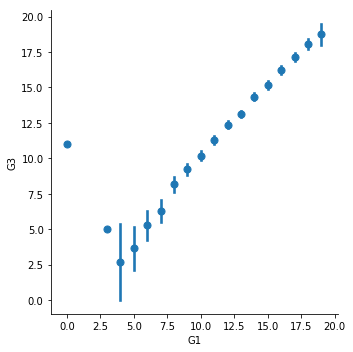

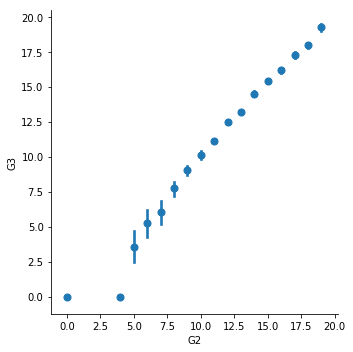

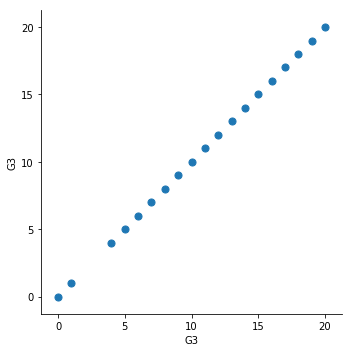

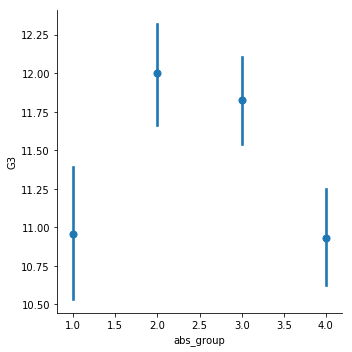

In [117]:
grade_df = pd.merge(math_df, port_df, how = 'outer')  # outer joining the two dataframes to make visualization simpler
for column in grade_df.columns:                       #plotting all of the columns w/ respect to G3
    if type(grade_df[column][0]) == str:
        plt.figure()
        sns.barplot(x = column, y = 'G3', data = grade_df, palette='Blues_d')
    else:
        sns.lmplot(x = column, y = 'G3', data = grade_df, x_estimator = np.mean, fit_reg = False, x_ci=90)
plt.show()


As expected, the first and second third grades (G1 and G2) correlate strongly with the final grade (G3).

One of the more interesting observations comes when looking at the students health with respect to final grade. Here a significant negative correlation exists. Indicating that the poorer a students health, the better their grades on average. More work is needed to understand this.

Some other correlations which can be observed are the influence of weekday and weekend alcohol consumption on academic performance. The graphs for both indicate a negative correlation, it may be useful to even group the two if the correlation between them is strong. Another correlation which fits quite well with assumptions is the 'G3 vs. Higher' graph, which shows the preference for higher education in some students. As one would expect, a preference for higher education correlates positively with final grade. 

Aside from the general goal of finding what most influences a students academic success. Another interesting goal might be to understand what 'independent' variables are correlated with one another. For instance, in the case of student health and quality of family life, the two variables are related. It may be possible that other independent variables are related. And as such, one might be able to minimize the variables which are used to assess student performance. Further, This will also aid in our modelling process when machine learning is used. 

# Potential Hypothesis to Test

A hypothesis which can be made and easily verified is that health and quality of family life should be positively correlated. This being because they most likely affect one another in some way. As shown below, one can see this to be true, that there is a positive correlation. However, this leads us to another interesting question. How is it that health and quality of family life are both positively correlated with one another, but they both affect the final grade in different ways? That is, how does good health negatively affect grades while high quality family life positively affects grades? Further investigation will be done to understand this apparent anomaly.

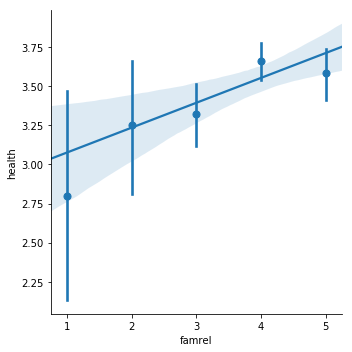

In [118]:
sns.lmplot(x = 'famrel', y = 'health', data = grade_df, x_estimator = np.mean, fit_reg = True)
plt.show()

# Hypothesis Testing: Intra-Country Data Source

### Numerical Intra-Country Testing

To test the strength of correlation between different independent and dependent variables for the intra country data source, a hypothesis test is performed below. The basic premise is: if there is a correlation between two random variables (X,Y), a non-zero Pearson correlation coefficient, $\rho_{XY}$, will be observed. Hence the following hypotheses can be postulated:

$H_0$: there is no correlation between a pair of random variables (X,Y), hence $\rho_{XY}=0$

$H_A$: there is a correlation between a pair of random variables (X,Y), $\rho_{XY}\neq0$

### Categorical Intra-Country Testing

To test whether the categorical variables have statistical significance a two-sample bootstrap test is used. We test, such that the highest and lowest average values for a category (as determined by the respective bar graphs) are compared to one another. It should be noted that only some variables have significance which can be easily determined from the plots. That is, when two confidence intervals overlap for the categories, the variable should be statistically insignificant. Consequently one can choose to only focus on those which have no overlap. Therefore, our hypothesis test is as follows:

$H_0$: the difference between the highest and lowest mean values in a category is zero

$H_A$: the difference between the highest and lowest mean values in a category is non-zero

From the p-values one can then determine the relative significance of each variable. 

In [119]:
# HYPOTHESIS TESTING FOR NUMERICAL VARIABLES IN INTRA-COUNTRY DATA SOURCE

p = dict()  # initialize dictionary to store correlations and p-values


# taking all numerical value columns and determining the p-values for pearson correlation coeff.. 
for column1 in grade_df.columns:        
    for column2 in grade_df.columns:
        if (type(grade_df[column1][0]) != str) & (type(grade_df[column2][0]) != str):
            (corr, p_val) = stats.pearsonr(grade_df[column1].astype(float), grade_df[column2].astype(float))
            if (p_val < .05) & (column1 != column2):
                p[column1+' with '+column2] = [p_val, corr]
                
# converting to dataframe with p-values and pearson correlation coef. values                
corr_df = pd.DataFrame.from_dict(p, orient='index')
corr_df.rename(columns = {0:'p-value', 1:'pearson_corr'}, inplace=True)
corr_df.drop_duplicates('p-value', keep='first', inplace=True)
corr_df = corr_df.sort_values(by=['p-value'])
corr_df.head()

,p-value,pearson_corr
G2 with G3,0.000000e+00,0.910743
G1 with G2,7.649931e-305,0.858739
G1 with G3,7.556322e-243,0.809142
Medu with Fedu,2.167656e-122,0.642063
Dalc with Walc,1.609078e-115,0.627814


One can visualize the correlation a bit more easily with a heat map as shown below:

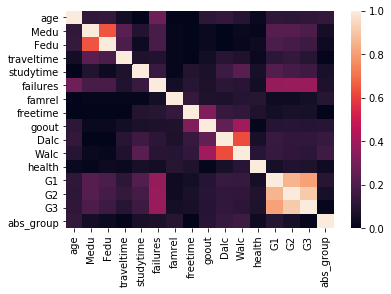

In [120]:
sns.heatmap(np.abs(grade_df.corr()))
plt.show()

In [121]:
# HYPOTHESIS TESTING FOR CATEGORICAL VARIABLES IN INTRA-COUNTRY DATA SOURCE

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)
    # Generate replicates
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data, size=len(data)))
    return bs_replicates

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

# arrays for comparing significant categorical variables
address_G3 = [grade_df.loc[grade_df['address']=='U'].G3, grade_df.loc[grade_df['address']=='R'].G3]
mjob_G3 = [grade_df.loc[grade_df['Mjob']=='health'].G3, grade_df.loc[grade_df['Mjob']=='at_home'].G3]
reason_G3 = [grade_df.loc[grade_df['reason']=='reputation'].G3, grade_df.loc[grade_df['reason']=='course'].G3]
guardian_G3 = [grade_df.loc[grade_df['guardian']=='father'].G3, grade_df.loc[grade_df['guardian']=='other'].G3]
schoolsup_G3 = [grade_df.loc[grade_df['schoolsup']=='yes'].G3, grade_df.loc[grade_df['schoolsup']=='no'].G3]
higher_G3 = [grade_df.loc[grade_df['higher']=='yes'].G3, grade_df.loc[grade_df['higher']=='no'].G3]
internet_G3 = [grade_df.loc[grade_df['internet']=='yes'].G3, grade_df.loc[grade_df['internet']=='no'].G3]
romantic_G3 = [grade_df.loc[grade_df['romantic']=='yes'].G3, grade_df.loc[grade_df['romantic']=='no'].G3]

cat_list = [address_G3, mjob_G3, reason_G3, guardian_G3, schoolsup_G3, higher_G3, internet_G3, romantic_G3]
cat_listnames = ['address_G3', 'mjob_G3', 'reason_G3', 'guardian_G3', 'schoolsup_G3', 'higher_G3', 'internet_G3', 'romantic_G3']
p = []
for index, cat in enumerate(cat_list):
    
    mean_both = np.mean(cat[0].append(cat[1]))
    empirical_diff_means = cat[0].mean() - cat[1].mean()

    # Generate shifted arrays
    cat_0 = cat[0] - np.mean(cat[0]) + mean_both
    cat_1 = cat[1] - np.mean(cat[1]) + mean_both

    # Compute 50,000 bootstrap replicates from shifted arrays
    bsrep_cat1 = draw_bs_reps(cat_0, np.mean, 50000)
    bsrep_cat0 = draw_bs_reps(cat_1, np.mean, 50000)

    # Get replicates of difference of means: bs_replicates
    bs_replicates = bsrep_cat1 - bsrep_cat0

    # Compute and print p-value: p
    p.append(cat_listnames[index] + ' p-value: ' + str(float(np.sum(bs_replicates >= np.abs(empirical_diff_means))) / len(bs_replicates)))
#     print('p-value = ' + str(p))
print(p)

['address_G3 p-value: 4e-05', 'mjob_G3 p-value: 0.0', 'reason_G3 p-value: 4e-05', 'guardian_G3 p-value: 0.00166', 'schoolsup_G3 p-value: 0.00016', 'higher_G3 p-value: 0.0', 'internet_G3 p-value: 0.00034', 'romantic_G3 p-value: 0.00114']


# Analysis of Hypothesis Testing: Intra-Country Data Source

### Numerical Intra-Country Analysis 

using scipy.stats.pearsonr, the p-value along with $\rho_{XY}$ is calculated. Any p-value less than .05 is discarded as statistically insignificant. All of the remaining p-values are kept and stored in the dataframe below. There are 83 pairs of variables within this dataset which have a statistically significant correlation between them. Of course, some are more significant than others and so the dataframe is put in descending order with the first value being the most statistically significant. 

As expected, the variables with the most significance to one another are the grades (G1, G2, G3) with one another. Interestingly however, the next most significant correlation exists between mothers education and fathers education. Then following with weekend alcohol consumption correlating with M-F alcohol consumption. These correlations are important for our analysis. 

Also, one can answer the apparent anomaly which appears in the earlier 'Potential Hypothesis to Test' section. Indeed the health and quality of family relationship do have a statistically significant correlation. However, only the health of the student is significantly correlated with G3 and not the quality of family relationship (famrel). Consequently, the apparent anomaly from inverse correlation of famrel is non-existant. 

The end goal is to determine what most affects G3, and as such we can look at the $\rho_{XY}$ values to see which variables are most important. However, the relationship between independent variables is of importance too when utilizing machine learning models. That is, pairs of independent variables with high correlation can have one of the variables neglected. In example, since mothers education and fathers education are strongly correlated, one can be neglected in certain machine learning models. This will help to increase the accuracy of certain models. 

### Categorical Intra-Country Analysis

From the two-sample bootstrap method one can see all of the variables which were deemed to be significant. The eight which were chose (address, mjob, reason, guardian, schoolsup, higher, internet, romantic) were chosen because they had no overlap in the confidence intervals for the two outermost average values, as can be seen in the above bar graphs. Further, from the p-values one can see they are all indeed statistically significant, and the two most significant are: mothers job (mjob) and whether the student wishes to pursue higher education (higher). While the least significant is the difference of guardian value, which makes sense from the guardian bar graph.

# Analysis of Hypothesis Testing: Inter-Country Data Source

In [122]:
# HYPOTHESIS TESTING FOR NUMERICAL VARIABLES IN INTER-COUNTRY DATA SOURCE

(corr_spend, p_val_spend) = stats.pearsonr(PISA_spend_df['% of government expenditure on education'], PISA_spend_df['avg_grade'])
(corr_size, p_val_size) = stats.pearsonr(PISA_size_df['class_size'], PISA_size_df['avg_grade'])
print('correlation coefficient for spending is: ' + str(corr_spend), 'p-value is: ' + str(p_val_spend))
print('correlation coefficient for class size is: ' + str(corr_size), 'p-value is: ' + str(p_val_size))

correlation coefficient for spending is: 0.19002983125817616 p-value is: 0.4222806290715796
correlation coefficient for class size is: -0.16184788606958217 p-value is: 0.41993720050848293


# Analysis of Hypothesis Testing contd.

From the above we can see that althought there are slight trends in the inter-country data in regards to their impact on the PISA grade, it is minimal. Since the p-value >> .05 we reject the null hypothesis. Therefore, we conclude the classroom size and the % of GDP spent on education has a statiscally insignificant effect on the PISA grades. 

Consequently, the inter-country data will be discarded for the remainder of the discussion about determining which factors most affect a students academic success. That being said, it is possible other factors play a role which were not accounted for. For example, other variables such as teacher salary were not included. Also, it may be worthwhile to consider the effects of classroom size and % of GDP spent on education as it pertains to only developed countries. It may be possible that a lower p-value will be observed and the variables deemed statistically significant. 

# Potential Machine Learning Testing Method

### The way the models will be trained is in the following way so we can predict accuracy:

1.) With G2 and G1 included in prediction of G3

2.) With G2 and G1 included, and also removing some correlated independent variables to predict G3

3.) Without G2 and G1 included in prediction for G3

4.) Without G2 and G1 included, and also removing some correlated independent variables to predict G3

CLearly those models without G2 and G1 will have the least predictive accuracy. But it is important to consider them because G2 and G1 are variables which occur after part of the year is already over (which is not as useful for determining at risk students before the year begins). 

### the determination of G3 will be split in the following way:

1.) Binary: pass (if G3 >= 10), fail (if G3 < 10)

2.) 5-level classification: using the following scheme: A:(16-20), B:(14-15), C:(12-13), D:(10-11), F(0-9)
    
    we'll let A=1, B=2, C=3, D=4, F=5

3.) Regression: using G3 value

This follows closely to the classification scheme which is used in the academic paper which the original data comes from. 

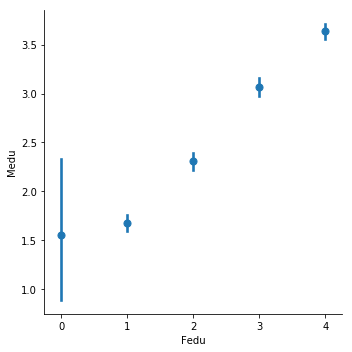

In [123]:
sns.lmplot(x = 'Fedu', y = 'Medu', data = grade_df, x_estimator = np.mean, fit_reg = False, x_ci=90)
plt.show()

# Machine Learning

First columns needs to be added for the binary classification and 5-level classification.

In [124]:
grade_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,G1,G2,G3,abs_group
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,5,6,6,3.0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,5,5,6,3.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,7,8,10,4.0
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,15,14,15,2.0
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,6,10,10,3.0


In [125]:
# Binary classification setup
grade_df.loc[grade_df.G3>=10, 'pass_fail'] = 1
grade_df.loc[grade_df.G3<10, 'pass_fail'] = 0

# 5-level classification setup
grade_df.loc[grade_df.G3>=16, 'grade'] = 5   # A
grade_df.loc[(grade_df.G3<16) & (grade_df.G3>13), 'grade'] = 4   # B
grade_df.loc[(grade_df.G3 >= 12) & (grade_df.G3<=13), 'grade'] = 3   # C
grade_df.loc[(grade_df.G3>=10) & (grade_df.G3<=11), 'grade'] = 2   # D
grade_df.loc[grade_df.G3<=9, 'grade'] = 1   # F

# Get dummy variables for categorical features.
# This is necessary to perform the analysis

grade_dummies_df = pd.get_dummies(grade_df)

In [126]:
# Importing proper libraries
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn import svm

First we'll do the pass fail binary test without the G1 and G2 grades. For the binary and 5-level test we're performing classification. Since the data is not too large (greater than 10k), an SGD classifier will be used. Specifically SGD is used with both log and linear SVM loss functions. In all cases the log loss function performed better.

Further, in each test normalization will be done to each feature using the StandardScaler() method. Using a pipeline this is combined with the classifier and then grid searched with cross validation. 

### Binary pass/fail test 

In [127]:
X_wo = grade_dummies_df.drop(['G3','pass_fail', 'grade', 'G1', 'G2'], axis=1).values # features without G1 & G2
X_w = grade_dummies_df.drop(['G3','pass_fail', 'grade'], axis=1).values # features with G1 & G2
X_array = [X_wo, X_w]
i = 1
for X in X_array:
    y = grade_dummies_df.pass_fail.values
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5, test_size=0.2)
    scaler = StandardScaler()
    SGD = SGDClassifier(loss='log', tol=1e-3, max_iter=1000, n_jobs=-1, random_state=5)
    SGD_scaled = Pipeline(steps=[('scaler',scaler), ('SGD',SGD)])     #Pipeline which includes scaling of the data
    alphas = [.01, .05, .08, .03, .0050, .03, .1, 1, 10]        #Parameter values to test
    # l1_ratios = []
    param_grid = {'SGD__alpha':alphas}
    SGD_gs = GridSearchCV(SGD_scaled, param_grid=param_grid, cv=5)   #Performing gridsearch with cross-validation
    SGD_gs.fit(X_train, y_train)
    y_predict = SGD_gs.predict(X_test)
    while i == 1:
        print('accuracy score without G1 & G2 is: ' + str(accuracy_score(y_test, y_predict)))
        i += 1
print('accuracy score with G1 & G2 is: ' + str(accuracy_score(y_test, y_predict)))

accuracy score without G1 & G2 is: 0.8181818181818182
accuracy score with G1 & G2 is: 0.8851674641148325


The accuracy score for pass/fail without G1 and G2 is quite good. Approximately 82% of the students were correctly predicted. One would expect the accuracy to increase as G1 and G2 are added into the modeling. 

With G1 and G2 the pass/fail rate is correctly predicted on the testing set 89% of the time. This is an increase from without G1 and G2. 

### 5-level classification test

In [128]:
i=1
for X in X_array:
    y = grade_dummies_df.grade.values
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5, test_size=0.2)
    scaler = StandardScaler()
    SGD = SGDClassifier(loss='log', tol=1e-3, max_iter=1000, n_jobs=-1, random_state=5)
    SGD_scaled = Pipeline(steps=[('scaler',scaler), ('SGD',SGD)])
    alphas = [.01, .05, .08, .03, .0070, .03]
    # l1_ratios = []
    param_grid = {'SGD__alpha':alphas}
    SGD_gs = GridSearchCV(SGD_scaled, param_grid=param_grid, cv=5, iid=True)
    SGD_gs.fit(X_train, y_train)
    y_predict = SGD_gs.predict(X_test)
    while i == 1:
        print('accuracy score without G1 & G2 is: ' + str(accuracy_score(y_test, y_predict)))
        i += 1
print('accuracy score with G1 & G2 is: ' + str(accuracy_score(y_test, y_predict)))

accuracy score without G1 & G2 is: 0.3349282296650718
accuracy score with G1 & G2 is: 0.5167464114832536


The 5-level classification is predicted with less accuracy as compared to the pass/fail classification. This is to be expected. Note that without G1 and G2 the accuracy is quite low at 35%. This shows the model is not accurate in predicting the students letter grades. Only about 1/3 of students are correctly predicted. 

With the addition of G1 and G2 the accuracy increases dramatically. The prediction of the students letter grades is correct about half of the time. 

### G3 Regression analysis
try Ridge Regression and LASSO

For the regression analysis we employ the use of ridge regression. This is because there is some colinearity among the features of the data set, which will affect OLS linear regression. This colinearity is evident from the Pearson correlation coefficient values which were calculated above (e.g. mother and fathers education are highly correlated). As above, scaling of the features is done along with a grid search with 5-fold cross validation. 

In [129]:
i=1
for X in X_array:
    y = grade_dummies_df.G3.values
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5, test_size=0.2)
    scaler = StandardScaler()
    ridge = Ridge()
    ridge_scaled = Pipeline(steps=[('scaler',scaler), ('ridge',ridge)])
    alphas = [430, 410, 420, 440]
    param_grid = {'ridge__alpha':alphas}
    ridge_gs = GridSearchCV(ridge_scaled, param_grid=param_grid, cv=5)
    ridge_gs.fit(X_train, y_train)
    y_predict = ridge_gs.predict(X_test)
    while i==1:
        print('R^2 value without G1 & G2 is: ' + str(r2_score(y_test, np.round(y_predict))))
        i += 1        
print('R^2 value with G1 & G2 is: ' + str(r2_score(y_test, np.round(y_predict))))

R^2 value without G1 & G2 is: 0.19905701059894487
R^2 value with G1 & G2 is: 0.7630617002782814


Without G1 and G2 the $R^2$ value is quite low at 0.2. Since in this dataset, the regression is the most difficult to predict, this is not surprising. 

With the addition of G1 and G2 the $R^2$ value increases greatly. Note that in both cases the predicted values must be rounded when calculation the $R^2$ value. This is because the actual grade values can only be integers, but the regression will predict as any value. If these scores are to actually be used for prediction one should take the rounded integer values as the actual prediction.

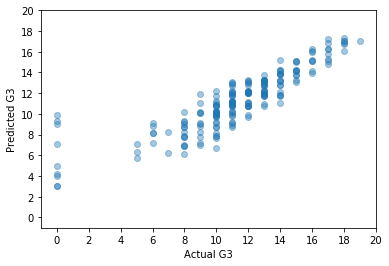

In [130]:
sns.regplot(y_test, np.round(y_predict), scatter_kws={'alpha':0.4}, fit_reg=0, y_jitter=0.3)
plt.ylabel('Predicted G3')
plt.xlabel('Actual G3')
plt.ylim([-1,20])
plt.xlim([-1,20])
plt.xticks(np.linspace(0,20,11))
plt.yticks(np.linspace(0,20,11))
plt.show()

Above one can see the plot between the actual final grades and the predicted grades. Note the G3 = 0 outliers which have a large degree of inaccuracy in the modelling. Although the actual dataset doesn't indicate what a value of G3 = 0 means, one might assume they imply a student has transferred to another school. This seems reasonable since there are many G3's which are zero that also have a G2 which is zero. But also these students records indicate they have not been missing classes. 

If it is the case that these students have left the school, that data should be discarded. Simply because it is not the models intent to predict which students will leave the school. Which is what a G3=0 value truly indicates. 

Consequently, the above modelling is done once more below with these values removed.  

Note that this is approximately 5% of our dataset, which may produce some noticeable effects. 

### Modeling with G3=0 values removed

In [131]:
grade_df_drop = grade_dummies_df
grade_df_drop = grade_df_drop.loc[grade_df_drop.G3!=0]  # Remove G3=0 values

### Binary Pass/Fail Classification

In [132]:
X_wo = grade_df_drop.drop(['G3','pass_fail', 'grade', 'G1', 'G2'], axis=1).values # defining features with dropped values
X_w = grade_df_drop.drop(['G3','pass_fail', 'grade'], axis=1).values 
X_array = [X_wo, X_w]
i=1
for X in X_array:
    y = grade_df_drop.pass_fail.values
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5, test_size=0.2)
    scaler = StandardScaler()
    SGD = SGDClassifier(loss='log', tol=1e-3, max_iter=1000, n_jobs=-1, random_state=5)
    SGD_scaled = Pipeline(steps=[('scaler',scaler), ('SGD',SGD)])
    alphas = [.01, .05, .08, .03, .0070, .03]
    # l1_ratios = []
    param_grid = {'SGD__alpha':alphas}
    SGD_gs = GridSearchCV(SGD_scaled, param_grid=param_grid, cv=5)
    SGD_gs.fit(X_train, y_train)
    y_predict = SGD_gs.predict(X_test)
    while i==1:
        print('Log accuracy score without G1 & G2 is: ' + str(accuracy_score(y_test, y_predict)))
        i += 1
print('Log accuracy score with G1 & G2 is: ' + str(accuracy_score(y_test, y_predict)))

Log accuracy score without G1 & G2 is: 0.8542713567839196
Log accuracy score with G1 & G2 is: 0.9246231155778895


In [133]:
# X = grade_df_drop[['failures', 'Medu', 'studytime', 'higher_yes', 'goout', 'internet_yes']].values # Defining the features
i = 1
for X in X_array:
    y = grade_df_drop.pass_fail.values
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5, test_size=0.2)
    scaler = StandardScaler()
    gaus_svm=svm.SVC(tol=1e-3, max_iter=-1, random_state=5)
    gaus_svm_scaled = Pipeline(steps=[('scaler',scaler), ('gaus_svm',gaus_svm)])
    Cs = [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 1000, 10000, 300]
    param_grid = {'gaus_svm__C':Cs}
    gaus_svm_gs = GridSearchCV(gaus_svm_scaled, param_grid=param_grid, cv=5)
    gaus_svm_gs.fit(X_train, y_train)
    y_predict = gaus_svm_gs.predict(X_test)
    while i == 1:
        print('Gaussian SVM accuracy score without G1 & G2 is: ' + str(accuracy_score(y_test, y_predict)))
        i += 1
print('Gaussian SVM accuracy score with G1 & G2 is: ' + str(accuracy_score(y_test, y_predict)))

Gaussian SVM accuracy score without G1 & G2 is: 0.8592964824120602
Gaussian SVM accuracy score with G1 & G2 is: 0.9296482412060302


### 5-Level Classification

In [134]:
i = 1
for X in X_array:
    y = grade_df_drop.grade.values
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5, test_size=0.2)
    scaler = StandardScaler()
    SGD = SGDClassifier(loss='log', tol=1e-3, max_iter=1000, n_jobs=-1, random_state=5)
    SGD_scaled = Pipeline(steps=[('scaler',scaler), ('SGD',SGD)])
    alphas = [.01, .05, .08, .03, .0070, .03]
    # l1_ratios = []
    param_grid = {'SGD__alpha':alphas}
    SGD_gs = GridSearchCV(SGD_scaled, param_grid=param_grid, cv=5, iid=True)
    SGD_gs.fit(X_train, y_train)
    y_predict = SGD_gs.predict(X_test)
    while i == 1:
        print('accuracy score without G1 & G2 is: ' + str(accuracy_score(y_test, y_predict)))
        i += 1
print('accuracy score with G1 & G2 is: ' + str(accuracy_score(y_test, y_predict)))

accuracy score without G1 & G2 is: 0.3417085427135678
accuracy score with G1 & G2 is: 0.5678391959798995


In [135]:
i = 1
for X in X_array:
    y = grade_df_drop.grade.values
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5, test_size=0.2)
    scaler = StandardScaler()
    gaus_svm=svm.SVC(tol=1e-3, max_iter=1000, random_state=5)
    gaus_svm_scaled = Pipeline(steps=[('scaler',scaler), ('gaus_svm',gaus_svm)])
    Cs = [1,2, 2.5, 3, 3.5, 4, 4.5, 5, 10,]
    param_grid = {'gaus_svm__C':Cs}
    gaus_svm_gs = GridSearchCV(gaus_svm_scaled, param_grid=param_grid, cv=5, iid=True)
    gaus_svm_gs.fit(X_train, y_train)
    y_predict = gaus_svm_gs.predict(X_test)
    while i==1:
        print('Gaussian SVM accuracy score without G1 & G2 is: ' + str(accuracy_score(y_test, y_predict)))
        i += 1
print('Gaussian SVM accuracy score with G1 & G2 is: ' + str(accuracy_score(y_test, y_predict)))        

Gaussian SVM accuracy score without G1 & G2 is: 0.3065326633165829
Gaussian SVM accuracy score with G1 & G2 is: 0.5226130653266332


### G3 Regression analysis
try Ridge Regression and LASSO

In [136]:
X_wo = grade_df_drop[['failures', 'Medu', 'studytime', 'higher_yes', 'goout', 'internet_yes']].values # Defining the features
X_w = grade_df_drop[['G2', 'G1', 'failures', 'Medu']].values # Defining the features
X_array = [X_wo, X_w]
i=1
for X in X_array:
    X = X.astype(np.float)
    y = grade_df_drop.G3.values
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5, test_size=0.2)
    scaler = StandardScaler()
    ridge = Ridge(alpha=1, tol=1e-3, max_iter=1000)
    ridge_scaled = Pipeline(steps=[('scaler',scaler), ('ridge',ridge)])
    ridge_scaled.fit(X_train, y_train)
    y_predict = ridge_scaled.predict(X_test)
    adjR2 = 1 - (1-ridge_scaled.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
    while i==1:
        print('Adjusted R^2 value without G1 & G2 is: ' + str(adjR2))
        i += 1
print('Adjusted R^2 value with G1 & G2 is: ' + str(adjR2))

Adjusted R^2 value without G1 & G2 is: 0.21621074069543444
Adjusted R^2 value with G1 & G2 is: 0.9097535931458496


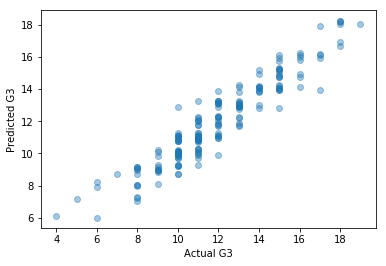

In [137]:
sns.regplot(y_test, np.round(y_predict), scatter_kws={'alpha':0.4}, fit_reg=0, y_jitter=0.3)
plt.ylabel('Predicted G3')
plt.xlabel('Actual G3')
# plt.ylim([0,20])
# plt.xlim([0,20])
# plt.xticks(np.linspace(0,20,11))
# plt.yticks(np.linspace(0,20,11))
plt.show()

### Extra Analysis with Random Forests

In [138]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

### Binary Classification

In [139]:
X_wo = grade_df_drop.drop(['G3','pass_fail', 'grade', 'G1', 'G2'], axis=1).values # Defining the features
X_w = grade_df_drop.drop(['G3','pass_fail', 'grade'], axis=1).values # Defining the features
i=1
X_array = [X_wo, X_w]
for X in X_array:
    y = grade_df_drop.pass_fail.values
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5, test_size=0.2)
    scaler = StandardScaler()
    RF = RandomForestClassifier(max_features='sqrt', n_estimators=100, min_samples_leaf=50, n_jobs=-1, random_state=5)
    RF_scaled = Pipeline(steps=[('scaler',scaler), ('RF',RF)])
    RF_scaled.fit(X_train, y_train)
    y_predict = RF_scaled.predict(X_test)
    while i==1:
        print('accuracy score without G1 & G2 is: ' + str(accuracy_score(y_test, y_predict)))
        i += 1
print('accuracy score with G1 & G2 is: ' + str(accuracy_score(y_test, y_predict)))

accuracy score without G1 & G2 is: 0.8542713567839196
accuracy score with G1 & G2 is: 0.8592964824120602


### 5-level Classification

In [140]:
X_wo = grade_df_drop.drop(['G3','pass_fail', 'grade', 'G1', 'G2'], axis=1).values # Defining the features
X_w = grade_df_drop.drop(['G3','pass_fail', 'grade'], axis=1).values # Defining the features
X_array = [X_wo, X_w]
i = 1
for X in X_array:
    y = grade_df_drop.grade.values
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5, test_size=0.2)
    scaler = StandardScaler()
    RF = RandomForestClassifier(max_features='sqrt', n_estimators=1000, min_samples_leaf=50, n_jobs=-1, random_state=5)
    RF_scaled = Pipeline(steps=[('scaler',scaler), ('RF',RF)])
    RF_scaled.fit(X_train, y_train)
    y_predict = RF_scaled.predict(X_test)
    while i==1:
        print('accuracy score without G1 & G2 is: ' + str(accuracy_score(y_test, y_predict)))
        i += 1
print('accuracy score with G1 & G2 is: ' + str(accuracy_score(y_test, y_predict)))

accuracy score without G1 & G2 is: 0.3969849246231156
accuracy score with G1 & G2 is: 0.6733668341708543


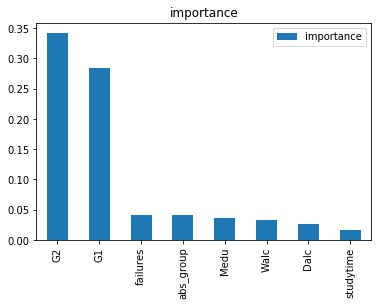

In [141]:
feature_importances = pd.DataFrame(RF.feature_importances_,
                                   index = grade_df_drop.drop(['G3','pass_fail', 'grade'], axis=1).columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances.head(8).plot(kind='bar', subplots=True)
plt.show()

### Regression

In [142]:
# X = grade_df_drop.drop(['G3','pass_fail', 'grade', 'G1', 'G2'], axis=1).values # Defining the features
X_wo = grade_df_drop[['failures', 'Medu', 'studytime', 'higher_yes', 'goout', 'internet_yes']].values # Defining the features
X_w = grade_df_drop[['G2', 'G1', 'failures', 'Medu']].values # Defining the features
i = 1
X_array = [X_wo, X_w]
for X in X_array:
    y = grade_df_drop.G3.values
    X = X.astype(np.float)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5, test_size=0.2)
    scaler = StandardScaler()
    RF = RandomForestRegressor(max_features='sqrt', n_estimators=1000, min_samples_leaf=50, n_jobs=-1, random_state=5)
    RF_scaled = Pipeline(steps=[('scaler',scaler), ('RF',RF)])
    RF_scaled.fit(X_train, y_train)
    y_predict = RF_scaled.predict(X_test)
    while i==1:
        print('R-squared value without G1 & G2 is: ' + str(r2_score(y_test, np.round(y_predict))))
        adjR2 = 1 - (1-RF_scaled.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
        print('Adjusted R^2 value without G1 & G2 is: ' + str(adjR2))
        i+=1
print('R-squared value with G1 & G2 is: ' + str(r2_score(y_test, np.round(y_predict))))
adjR2 = 1 - (1-RF_scaled.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Adjusted R^2 value with G1 & G2 is: ' + str(adjR2))

R-squared value without G1 & G2 is: 0.17846590560153952
Adjusted R^2 value without G1 & G2 is: 0.1597388117944738
R-squared value with G1 & G2 is: 0.858098656422084
Adjusted R^2 value with G1 & G2 is: 0.8564585101767224


# Accuracy plots from applied algorithms

In [143]:
algorithm = ['Linear SVM', 'Logarithmic', 'Gaussian SVM', 'Random Forest',
            'Linear SVM', 'Logarithmic', 'Gaussian SVM', 'Random Forest']

perc_wo = {'Accuracy':[0.874, 0.854, 0.859, 0.854, 0.905, 0.920, 0.930, 0.859], 
          'G1 & G2':['without G1 & G2', 'without G1 & G2', 'without G1 & G2', 'without G1 & G2'
                    , 'with G1 & G2', 'with G1 & G2','with G1 & G2', 'with G1 & G2']}


In [144]:
binary = pd.DataFrame(perc_wo, index=algorithm)

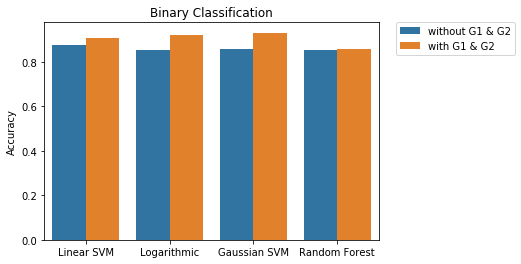

In [145]:
sns.barplot(x=binary.index, y='Accuracy', hue='G1 & G2',data=binary)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Binary Classification')
plt.show()

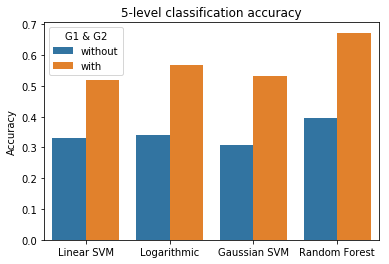

In [146]:
algorithm = ['Linear SVM', 'Logarithmic', 'Gaussian SVM', 'Random Forest',
            'Linear SVM', 'Logarithmic', 'Gaussian SVM', 'Random Forest']

perc_wo = {'Accuracy':[0.332, 0.342, 0.307, 0.397, 0.518, 0.568, 0.532, 0.673], 
          'G1 & G2':['without', 'without', 'without', 'without'
                    , 'with', 'with','with', 'with']}
five_level = pd.DataFrame(perc_wo, index=algorithm)
sns.barplot(x=five_level.index, y='Accuracy', hue='G1 & G2', data=five_level)
plt.title('5-level classification accuracy')
plt.show()

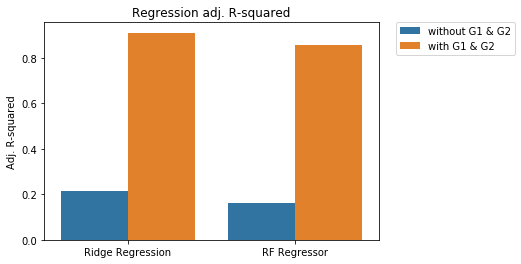

In [147]:
algorithm = ['Ridge Regression', 'RF Regressor',
            'Ridge Regression', 'RF Regressor']

perc_wo = {'Adj. R-squared':[0.216, 0.160, 0.910, 0.856], 
          'G1 & G2':['without G1 & G2', 'without G1 & G2',
                     'with G1 & G2', 'with G1 & G2']}
five_level = pd.DataFrame(perc_wo, index=algorithm)
sns.barplot(x=five_level.index, y='Adj. R-squared', hue='G1 & G2', data=five_level)
plt.title('Regression adj. R-squared')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()